Pipeline(steps=[('pca', PCA(n_components=5)),
                ('clf', SVC(C=1, gamma=0.001, kernel='linear'))])


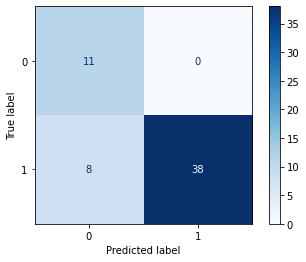

BACC: 0.7894736842105263
TSS: 0.5789473684210527
HSS: 0.6470588235294118


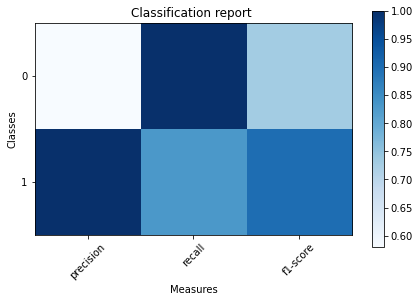

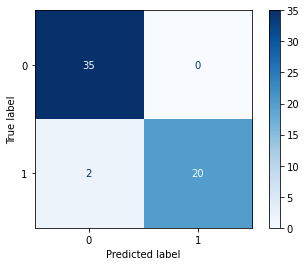

BACC: 0.972972972972973
TSS: 0.9459459459459459
HSS: 0.9247027741083224


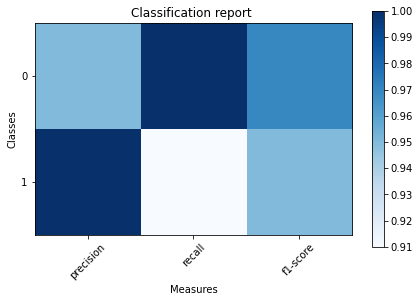

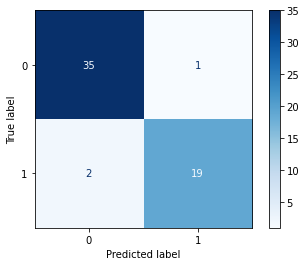

BACC: 0.9479729729729729
TSS: 0.8959459459459459
HSS: 0.8857715430861723


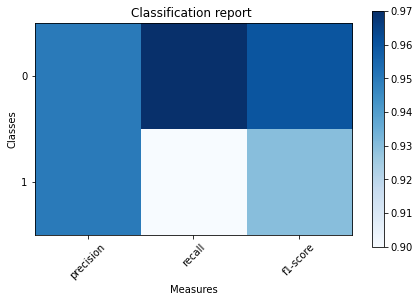

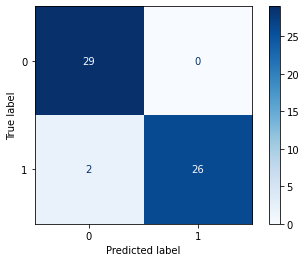

BACC: 0.967741935483871
TSS: 0.9354838709677419
HSS: 0.9297163995067818


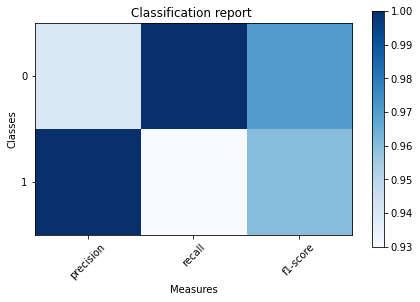

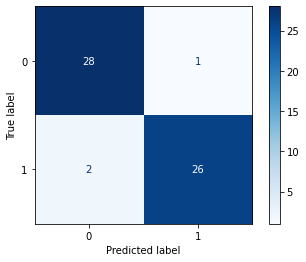

BACC: 0.9481481481481482
TSS: 0.8962962962962964
HSS: 0.8946395563770795


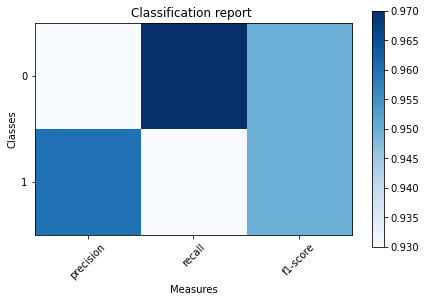

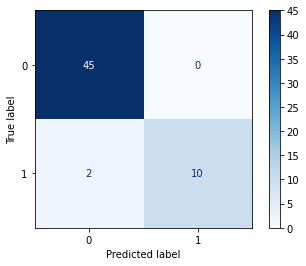

BACC: 0.9787234042553192
TSS: 0.9574468085106383
HSS: 0.8875739644970414


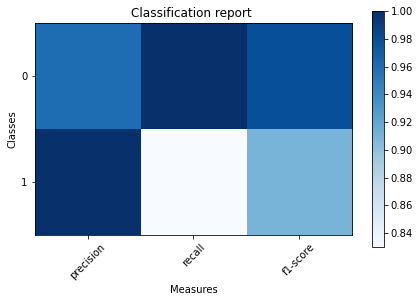

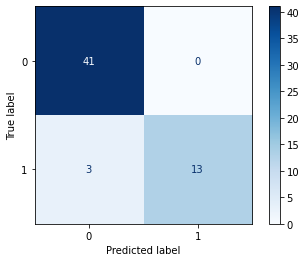

BACC: 0.9659090909090908
TSS: 0.9318181818181818
HSS: 0.8617623282134196


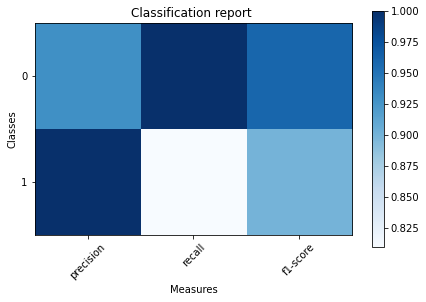

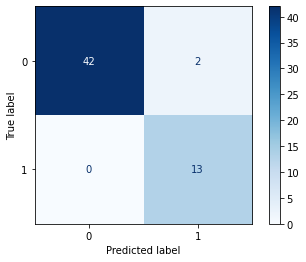

BACC: 0.9333333333333333
TSS: 0.8666666666666667
HSS: 0.9054726368159204


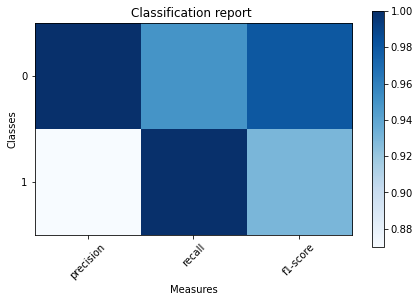

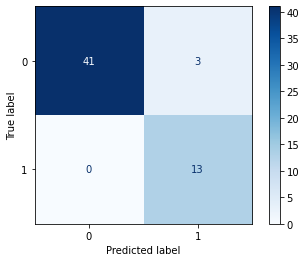

BACC: 0.90625
TSS: 0.8125
HSS: 0.8617623282134196


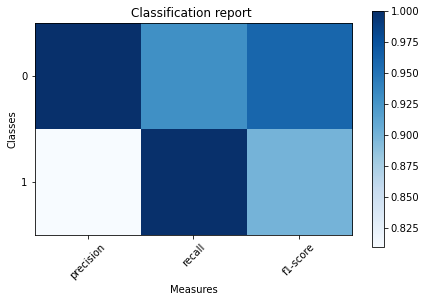

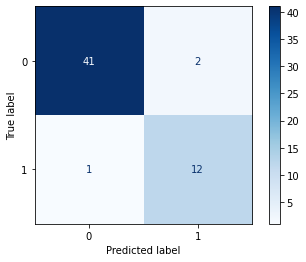

BACC: 0.9166666666666666
TSS: 0.8333333333333333
HSS: 0.8536585365853658
average of all 10 folds:

[[34.8, 0.9], [2.2, 19.0]]
Overall BACC: 0.9476572049436371
Overall TSS: 0.8953144098872742
Overall HSS: 0.8819999598616565
Overall Recall: 0.9405405405405405
Overall Precision: 0.9747899159663866
Overall F1 measure: 0.9573590096286106
Acc: 0.945518453427065
Error rate: 0.054481546572934976
Pipeline(steps=[('pca', PCA(n_components=5)), ('clf', LogisticRegression())])


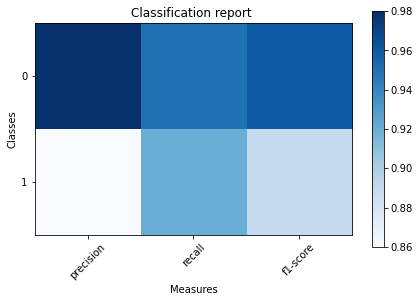

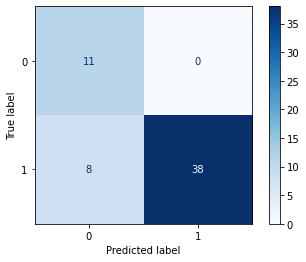

BACC: 0.7894736842105263
TSS: 0.5789473684210527
HSS: 0.6470588235294118


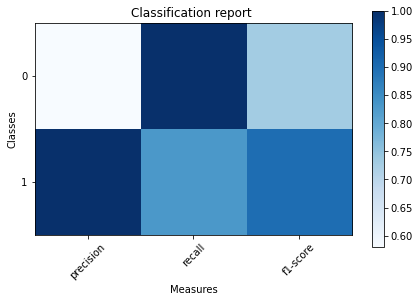

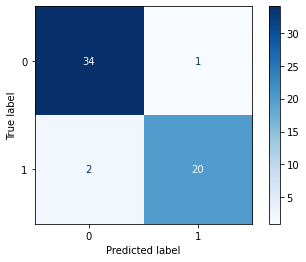

BACC: 0.9484126984126984
TSS: 0.8968253968253967
HSS: 0.888015717092338


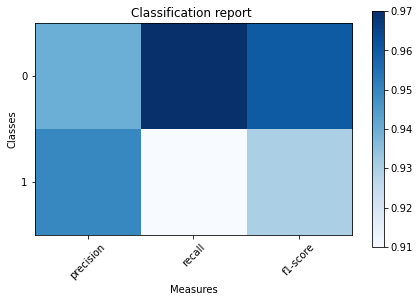

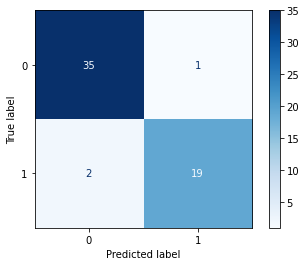

BACC: 0.9479729729729729
TSS: 0.8959459459459459
HSS: 0.8857715430861723


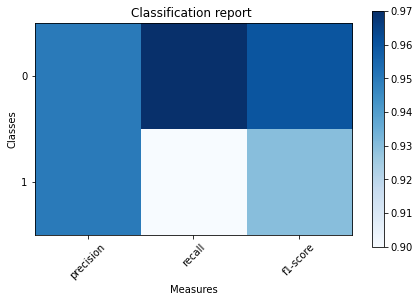

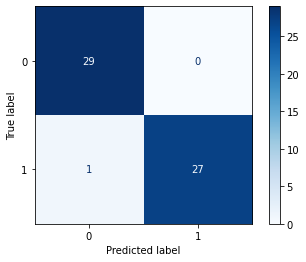

BACC: 0.9833333333333334
TSS: 0.9666666666666667
HSS: 0.9648798521256932


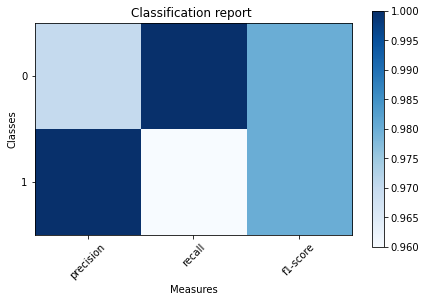

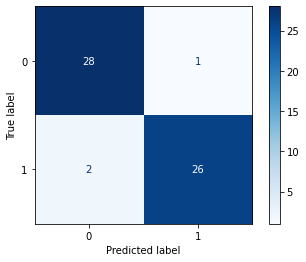

BACC: 0.9481481481481482
TSS: 0.8962962962962964
HSS: 0.8946395563770795


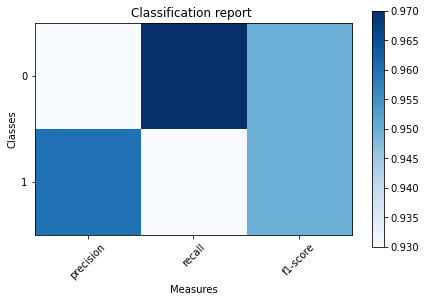

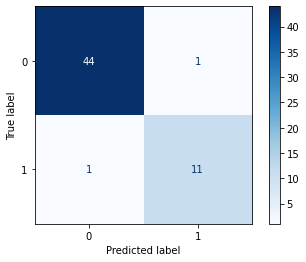

BACC: 0.9472222222222222
TSS: 0.8944444444444444
HSS: 0.8944444444444445


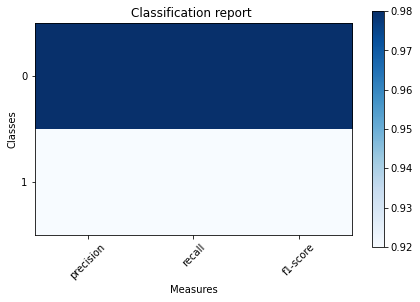

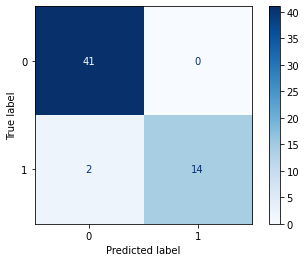

BACC: 0.9767441860465116
TSS: 0.9534883720930233
HSS: 0.9096671949286846


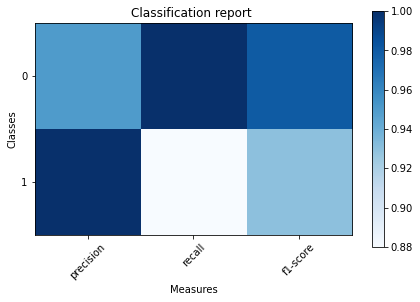

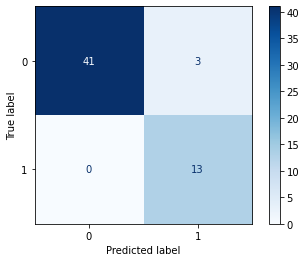

BACC: 0.90625
TSS: 0.8125
HSS: 0.8617623282134196


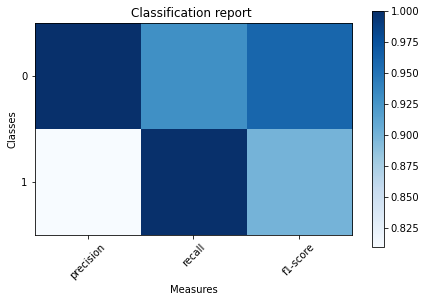

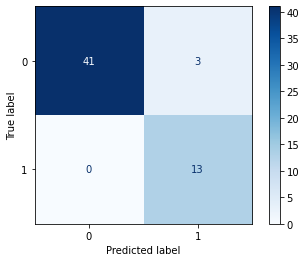

BACC: 0.90625
TSS: 0.8125
HSS: 0.8617623282134196


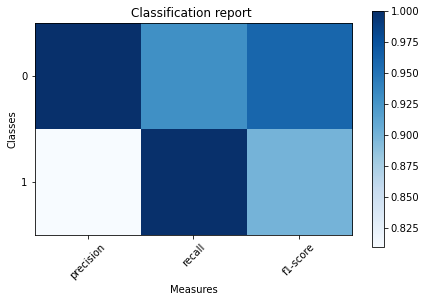

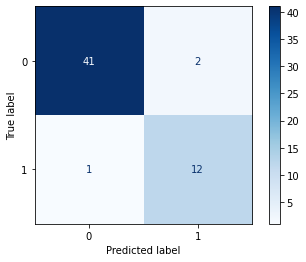

BACC: 0.9166666666666666
TSS: 0.8333333333333333
HSS: 0.8536585365853658
average of all 10 folds:

[[34.5, 1.2], [1.9, 19.3]]
Overall BACC: 0.9446328062181721
Overall TSS: 0.8892656124363443
Overall HSS: 0.882682753254009
Overall Recall: 0.9478021978021979
Overall Precision: 0.9663865546218486
Overall F1 measure: 0.9570041608876559
Acc: 0.9455184534270649
Error rate: 0.05448154657293496
Pipeline(steps=[('pca', PCA(n_components=5)),
                ('clf', RandomForestClassifier(max_depth=2))])


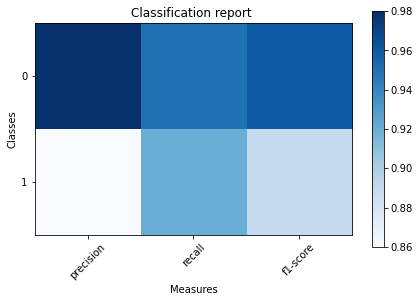

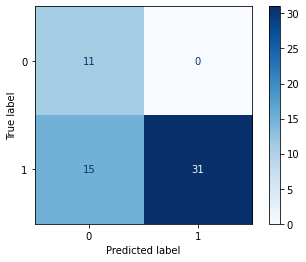

BACC: 0.7115384615384616
TSS: 0.4230769230769231
HSS: 0.44372153545868576


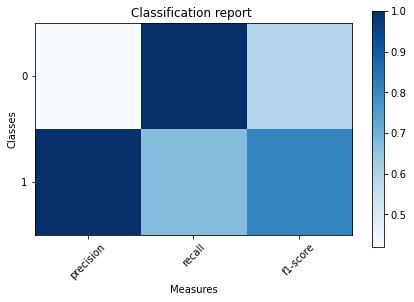

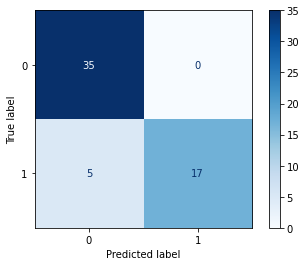

BACC: 0.9375
TSS: 0.875
HSS: 0.8067796610169492


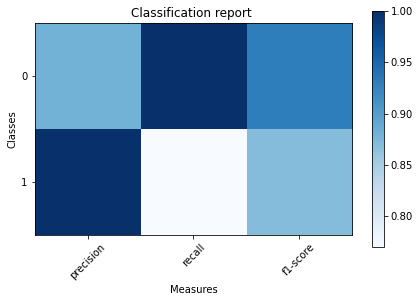

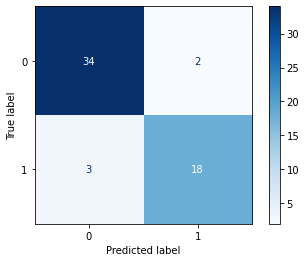

BACC: 0.9094594594594595
TSS: 0.818918918918919
HSS: 0.8096192384769539


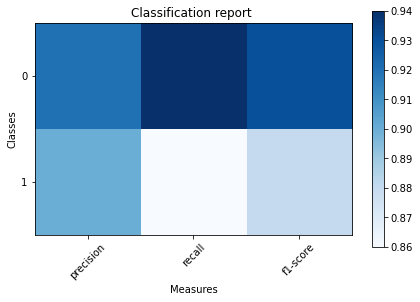

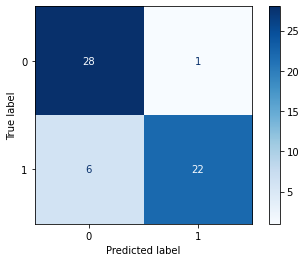

BACC: 0.8900255754475703
TSS: 0.7800511508951407
HSS: 0.7535515750463249


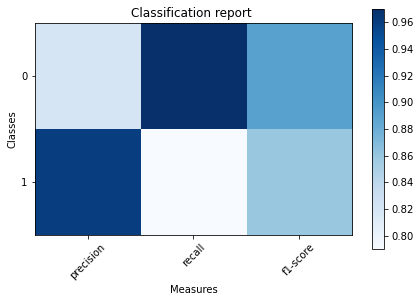

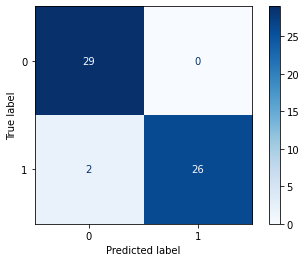

BACC: 0.967741935483871
TSS: 0.9354838709677419
HSS: 0.9297163995067818


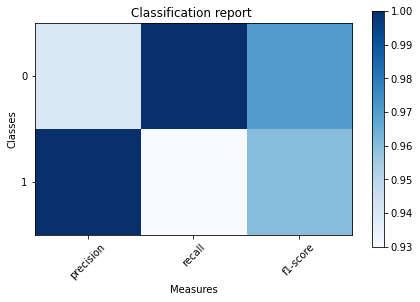

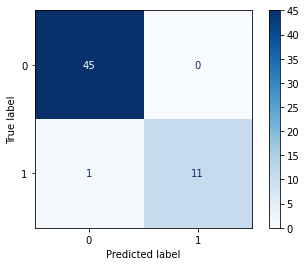

BACC: 0.9891304347826086
TSS: 0.9782608695652174
HSS: 0.9455587392550143


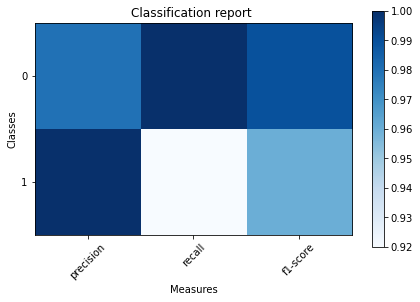

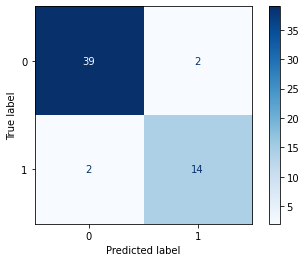

BACC: 0.913109756097561
TSS: 0.8262195121951219
HSS: 0.8262195121951219


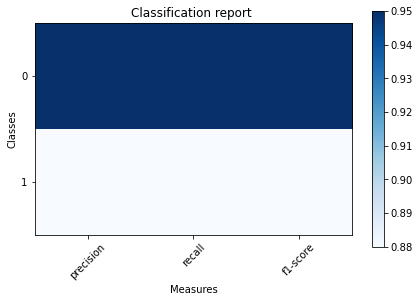

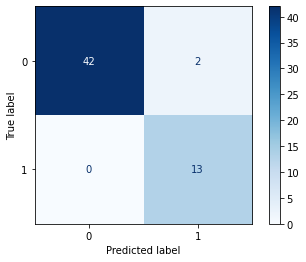

BACC: 0.9333333333333333
TSS: 0.8666666666666667
HSS: 0.9054726368159204


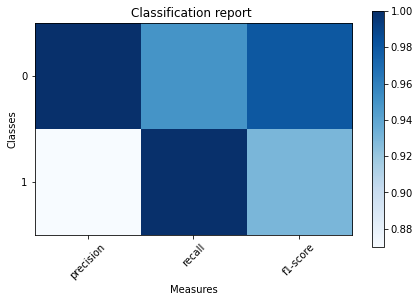

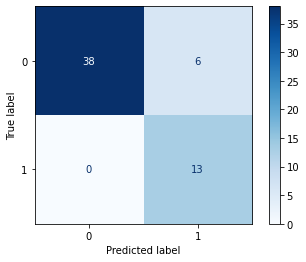

BACC: 0.8421052631578947
TSS: 0.6842105263157895
HSS: 0.7428571428571429


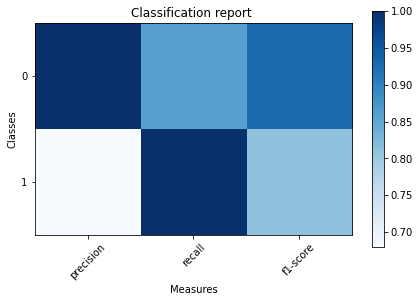

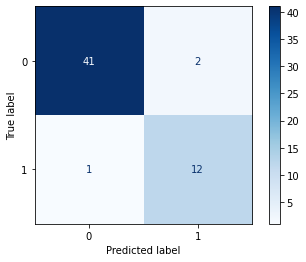

BACC: 0.9166666666666666
TSS: 0.8333333333333333
HSS: 0.8536585365853658
average of all 10 folds:

[[34.2, 1.5], [3.5, 17.7]]
Overall BACC: 0.9145184018567639
Overall TSS: 0.8290368037135278
Overall HSS: 0.8083762157501954
Overall Recall: 0.9071618037135278
Overall Precision: 0.957983193277311
Overall F1 measure: 0.9318801089918256
Acc: 0.9121265377855887
Error rate: 0.08787346221441124


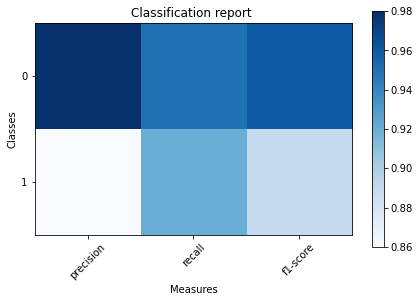

In [65]:
import numpy as np
import pandas as pd
from sklearn import metrics, svm
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

def plot_classification_report(cr, title='Classification report ', cmap=plt.cm.Blues):

    lines = cr.split('\n')
    labels = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        t = line.split()
        if len(t)==0:
            break
        labels.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(labels))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')
    
def recall(cm):
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    result = TP/(TP+FN)
    return result
def precision(cm):
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    result = TP/(TP+FP)
    return result
def f1_score(cm):
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    result = 2*TP/(2*TP+FP+FN)
    return result
def acc(cm):
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    result = (TP+TN)/(TP+FP+FN+TN)
    return result
def err_rate(cm):
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    result = (FP+FN)/(TP+FP+FN+TN)
    return result
def TSS(cm):
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    result = TP/(TP+FN)-FP/(FP+TN)
    return result

def HSS(cm):
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    result = 2 * (TP*TN-FP*FN)/((TP+FN)*(FN+TN)+(TP+FP)*(FP+TN))
    return result

def BACC(cm):
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    result = 0.5 * (TP/(TP+FN)+TN/(FP+TN))
    return result

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

pipe_lr = [Pipeline([('pca', PCA(n_components=5)), ('clf', svm.SVC(C=1, kernel='linear', gamma=0.001))]),
          Pipeline([('pca', PCA(n_components=5)), ('clf', LogisticRegression())]),
          Pipeline([('pca', PCA(n_components=5)), ('clf', RandomForestClassifier(max_depth=2))])]

for clf in pipe_lr:
    print(clf)
    kfold = KFold(n_splits=10)
    kfold.get_n_splits(X)
    reports = []
    cms = []
    for train, test in kfold.split(X):
        clf.fit(X[train], y[train])
        y_pred = clf.predict(X[test])
        cm = metrics.confusion_matrix(y[test], y_pred)
        cms.append(cm)
        plot_confusion_matrix(clf, X[test], y[test], cmap=plt.cm.Blues)
        plt.show()
        print("BACC:", BACC(cm))
        print("TSS:", TSS(cm))
        print("HSS:", HSS(cm))
        plot_classification_report(metrics.classification_report(y[test], y_pred))
    sum_cm = [[0, 0], [0, 0]]
    for i in range(len(cms)):
        sum_cm[0] = [x + y for x, y in zip(sum_cm[0], cms[i][0])]
        sum_cm[1] = [x + y for x, y in zip(sum_cm[1], cms[i][1])]
    avg_cm = [[0, 0], [0, 0]]
    avg_cm[0][0] = sum_cm[0][0]/10
    avg_cm[0][1] = sum_cm[0][1]/10
    avg_cm[1][0] = sum_cm[1][0]/10
    avg_cm[1][1] = sum_cm[1][1]/10
    print("average of all 10 folds:\n")
    print(avg_cm)
    print("Overall BACC:", BACC(avg_cm))
    print("Overall TSS:", TSS(avg_cm))
    print("Overall HSS:", HSS(avg_cm))
    print("Overall Recall:", recall(avg_cm))
    print("Overall Precision:", precision(avg_cm))
    print("Overall F1 measure:", f1_score(avg_cm))
    print("Acc:", acc(avg_cm))
    print("Error rate:", err_rate(avg_cm))